True Population Mean Age: 10.07


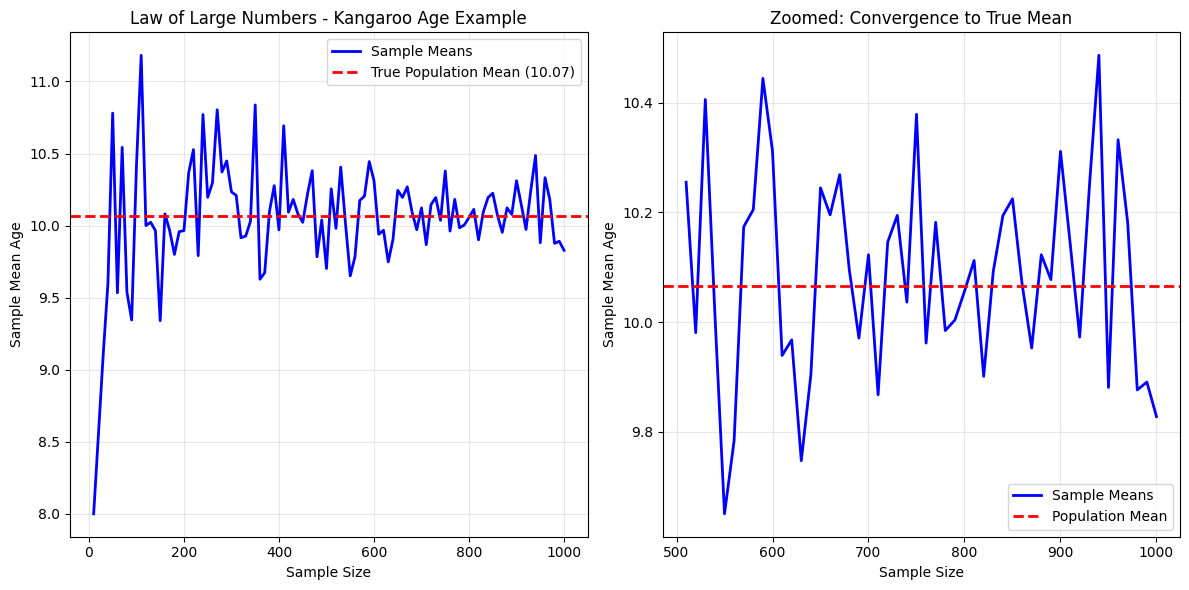


Convergence Analysis:
Sample Size | Sample Mean | Distance from True Mean
--------------------------------------------------
      50    |    10.78    |        0.713
     100    |    10.41    |        0.343
     200    |     9.96    |        0.102
     500    |     9.70    |        0.365
    1000    |     9.83    |        0.239

🎯 Key Insight: As sample size increases, sample mean gets closer to population mean!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create Australian Kangaroo population
np.random.seed(42) 
population = np.random.randint(1, 20, size=10000)  # ages between 1 and 20

# Calculate true population mean (this is what we're trying to estimate)
population_mean = np.mean(population)
print(f"True Population Mean Age: {population_mean:.2f}")

# 2. Law of Large Numbers demonstration function
def demonstrate_lln(population, max_sample_size=1000):
    """
    Show how sample mean approaches population mean as sample size increases
    """
    # Create different sample sizes to test
    sample_sizes = np.arange(10, max_sample_size + 1, 10)  # 10, 20, 30, ..., 1000
    sample_means = []
    
    for n in sample_sizes:
        # Take a sample of size n from the population
        sample = np.random.choice(population, size=n, replace=True)
        # Calculate the mean of this sample
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    
    return sample_sizes, sample_means

# 3. Run the Law of Large Numbers demonstration
sample_sizes, sample_means = demonstrate_lln(population)

# 4. Plot the results - showing convergence to population mean
plt.figure(figsize=(12, 6))

# Main plot showing convergence
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, sample_means, 'b-', linewidth=2, label='Sample Means')
plt.axhline(y=population_mean, color='red', linestyle='--', linewidth=2, label=f'True Population Mean ({population_mean:.2f})')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean Age')
plt.title('Law of Large Numbers - Kangaroo Age Example')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoomed view of later convergence
plt.subplot(1, 2, 2)
start_idx = len(sample_sizes) // 2  # Start from halfway point
plt.plot(sample_sizes[start_idx:], sample_means[start_idx:], 'b-', linewidth=2, label='Sample Means')
plt.axhline(y=population_mean, color='red', linestyle='--', linewidth=2, label=f'Population Mean')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean Age')
plt.title('Zoomed: Convergence to True Mean')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Show numerical convergence at key points
checkpoints = [50, 100, 200, 500, 1000]
print(f"\nConvergence Analysis:")
print("Sample Size | Sample Mean | Distance from True Mean")
print("-" * 50)

for n in checkpoints:
    if n <= max(sample_sizes):
        idx = np.where(sample_sizes == n)[0][0]
        sample_mean = sample_means[idx]
        distance = abs(sample_mean - population_mean)
        print(f"    {n:4d}    |    {sample_mean:5.2f}    |        {distance:5.3f}")

print(f"\n🎯 Key Insight: As sample size increases, sample mean gets closer to population mean!")